In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [2]:
def plot_fft(signal, sr, title):
    fft_vals = np.fft.rfft(signal)
    fft_freqs = np.fft.rfftfreq(len(signal), 1 / sr)

    magnitude = np.abs(fft_vals)

    plt.figure(figsize=(14, 5))
    plt.plot(fft_freqs, magnitude, alpha=0.7)
    plt.title(f'Frequency Spectrum - {title}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
N = 8

def DFT(signal, N):
    X = []

    for k in range(N):
        val = 0
        for n in range(N):
            val += signal[n] * np.exp(-2j * np.pi * k * n / N)
        X.append(val)
    
    return np.array(X)

In [4]:
# DFT results
results = {}

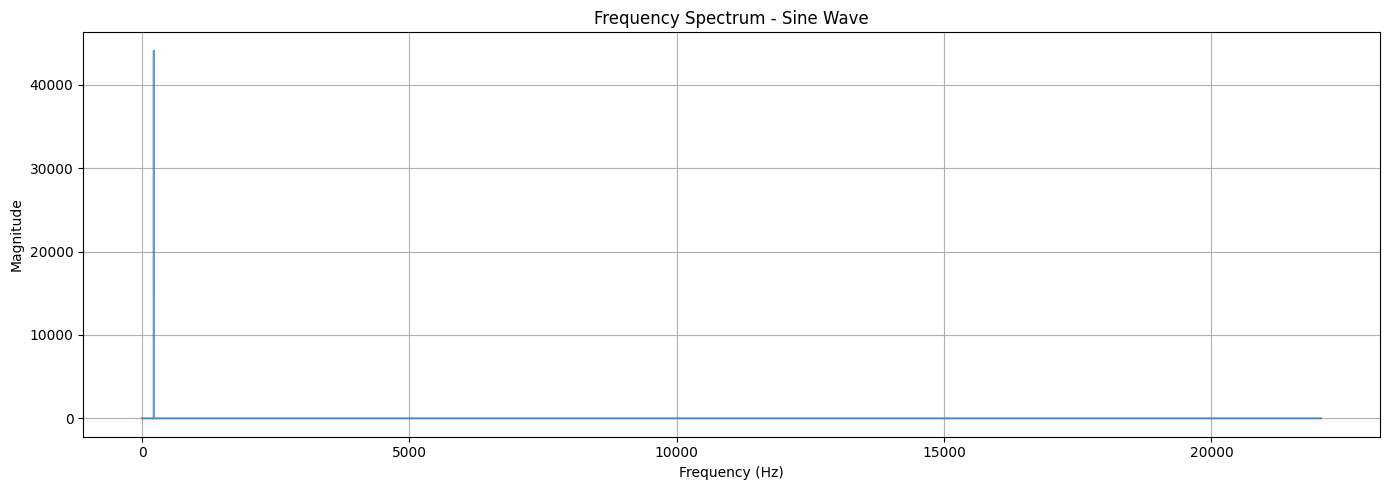

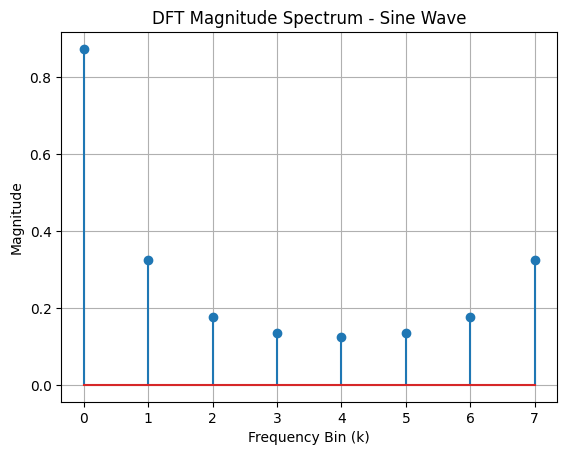

In [ ]:
signal_sine, sr = sf.read('data/prototype_signals_q3/sine.wav')
signal_sine = signal_sine / np.max(signal_sine)
plot_fft(signal_sine, sr, 'Sine Wave')

X = DFT(signal_sine, N)
results["sine"] = X

magnitude = np.abs(X)

plt.stem(range(N), magnitude)
plt.title("DFT Magnitude Spectrum - Sine Wave")
plt.xlabel("Frequency Bin (k)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

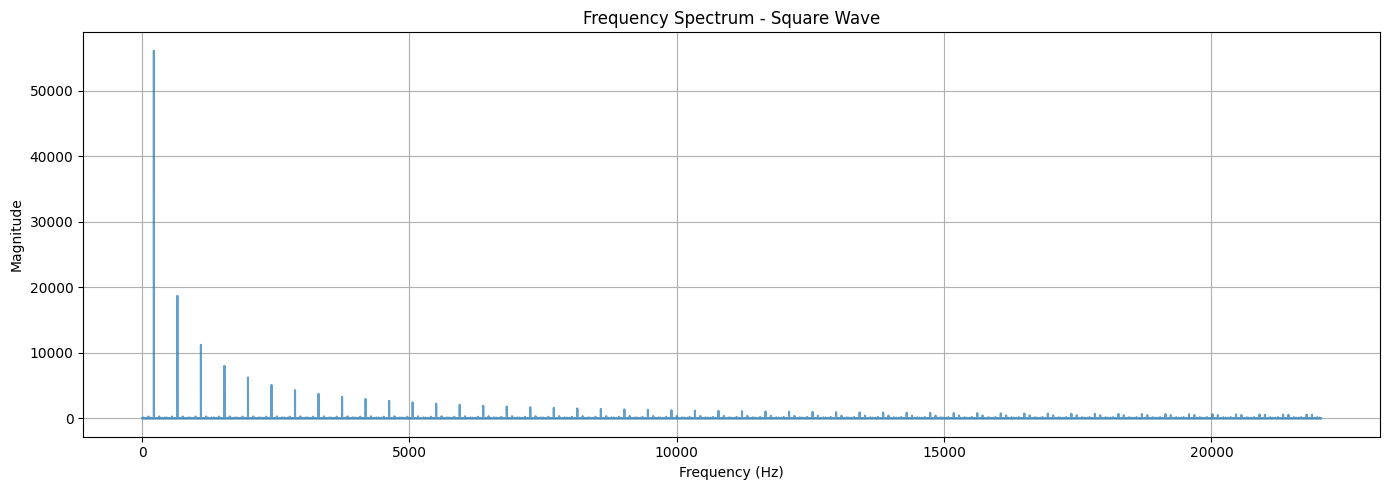

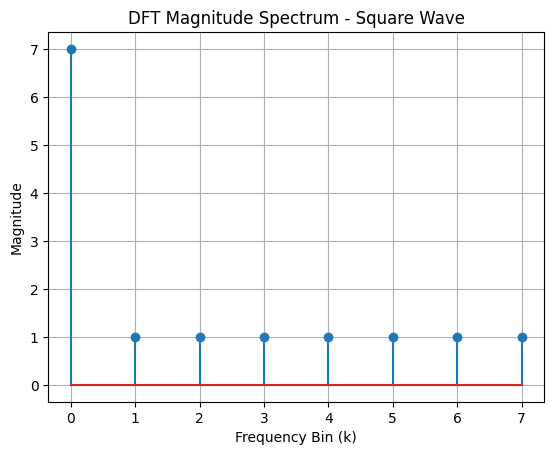

In [ ]:
signal_square, sr = sf.read('data/prototype_signals_q3/square.wav')
signal_square = signal_square / np.max(signal_square)
plot_fft(signal_square, sr, 'Square Wave')

X = DFT(signal_square, N)
results["square"] = X

magnitude = np.abs(X)

plt.stem(range(N), magnitude)
plt.title("DFT Magnitude Spectrum - Square Wave")
plt.xlabel("Frequency Bin (k)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

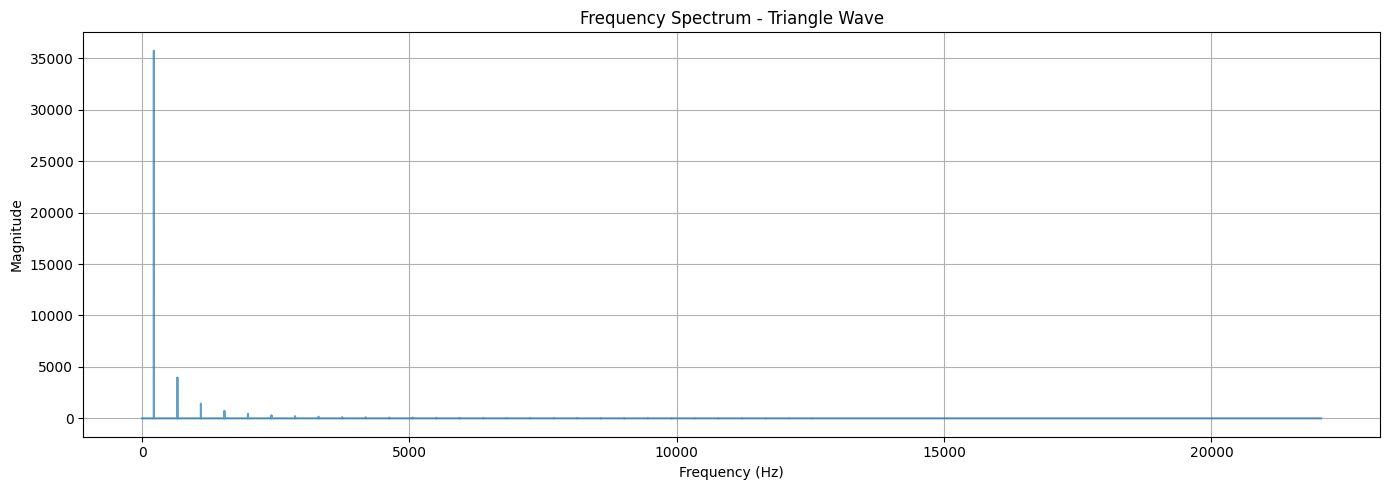

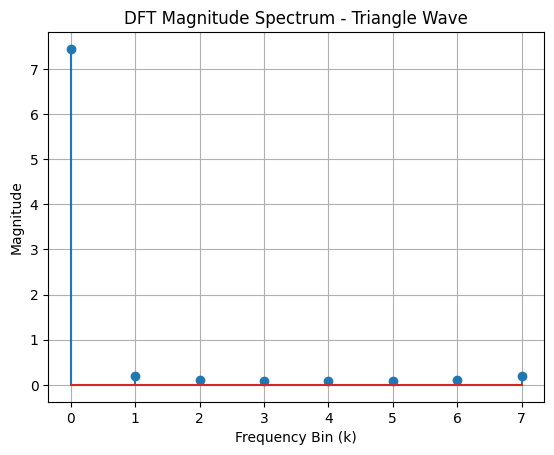

In [ ]:
signal_triangle, sr = sf.read('data/prototype_signals_q3/triangle.wav')
signal_triangle = signal_triangle / np.max(signal_triangle)
plot_fft(signal_triangle, sr, 'Triangle Wave')

X = DFT(signal_triangle, N)
results["triangle"] = X

magnitude = np.abs(X)

plt.stem(range(N), magnitude)
plt.title("DFT Magnitude Spectrum - Triangle Wave")
plt.xlabel("Frequency Bin (k)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [8]:
def classifier(x_new, N, prototypes):
    x_new = x_new[:N]
    X_new = DFT(x_new, N)
    X_new_mag = np.abs(X_new)

    min_dist = float('inf')
    best_class = None

    # Euclidian formula
    for label, proto in prototypes.items():
        X_proto_mag = np.abs(proto)
        dist = np.linalg.norm(X_new_mag - X_proto_mag)
        if dist < min_dist:
            min_dist = dist
            best_class = label

    return best_class

In [9]:
for i in range(12):
    signal, sr = sf.read(f"data/signals_q3/sample_{i+1}.wav")

    signal = signal / np.max(np.abs(signal))

    classed = classifier(signal, N, results)

    print(f"Sample {i+1:2}: {classed}")

Sample  1: sine
Sample  2: sine
Sample  3: sine
Sample  4: sine
Sample  5: square
Sample  6: square
Sample  7: square
Sample  8: square
Sample  9: triangle
Sample 10: triangle
Sample 11: triangle
Sample 12: triangle
